In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [141]:
%cd /Users/ckuhn/Documents/CloudtoStreet
dfoMODIS = pd.read_csv('exportTable*.csv', low_memory=False)

/Users/ckuhn/Documents/CloudtoStreet


In [ ]:
frames = [all1, all2]
names = pd.concat(frames)
names ['AreaID'].unique()

In [142]:
dfoMODIS = dfoMODIS.drop(['system:index','.geo'], axis=1)

## Grouped Barplot

In [188]:
df = dfoMODIS
df

,Flood Algorithm,Flood ID,accuracy,fMeasure,fn,fp,precision,recall,tn,tp
0,MODIS,18,0.891518,0.877763,330,46,0.967049,0.803571,1740,1350
1,MODIS_Otsu,18,0.891518,0.877763,330,46,0.967049,0.803571,1740,1350
2,Landsat,18,0.891518,0.877763,330,46,0.967049,0.803571,1740,1350


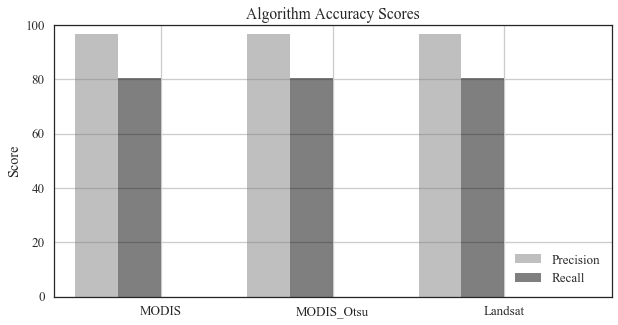

In [189]:
# Setting the positions and width for the bars

pos = list(range(len(df['precision']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['precision'].multiply(100), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='grey', 
        # with label the first value in first_name
        label=df['Flood Algorithm'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['recall'].multiply(100),
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='black', 
        # with label the second value in first_name
        label=df['Flood Algorithm'][1]) 


# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Algorithm Accuracy Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Flood Algorithm'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 100])

# Adding the legend and showing the plot
plt.legend(['Precision', 'Recall'], loc='lower right')
plt.grid()
plt.show()

### Reshape the Dataframe for Groupby Methods

In [190]:
stats = pd.melt(dfoMODIS, id_vars=['Flood Algorithm','Flood ID'], var_name='Metric', value_name = 'Score')
stats.head(5)

,Flood Algorithm,Flood ID,Metric,Score
0,MODIS,18,accuracy,0.891518
1,MODIS_Otsu,18,accuracy,0.891518
2,Landsat,18,accuracy,0.891518
3,MODIS,18,fMeasure,0.877763
4,MODIS_Otsu,18,fMeasure,0.877763


### Groupby methods - Just precision and recall